# Image Classification using Logistic Regression and Softmax Regression
### Fashion-MNIST Dataset

## 1. Install Required Libraries
Before starting, you need to install the necessary Python libraries:
- **TensorFlow**: Used for building and training the Softmax Regression model.
- **Scikit-Learn**: Provides the Logistic Regression implementation.
- **Matplotlib**: Used for plotting images and confusion matrices.
```bash
pip install tensorflow scikit-learn matplotlib
```


In [13]:
pip install tensorflow scikit-learn matplotlib

## 2. Import Necessary Libraries
In this step, we import the necessary libraries to handle data processing, model training, and evaluation.


In [14]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
from tensorflow.keras import datasets, layers, models
from tensorflow.keras.utils import to_categorical


## 3. Load and Preprocess the Fashion-MNIST Dataset
Fashion-MNIST is a dataset of Zalando's article images consisting of 60,000 training images and 10,000 test images, categorized into 10 classes.


In [15]:
# Load the Fashion-MNIST dataset
(train_images, train_labels), (test_images, test_labels) = datasets.fashion_mnist.load_data()

# Normalize the pixel values to be between 0 and 1
train_images = train_images / 255.0
test_images = test_images / 255.0

# Flatten images for Logistic Regression


## 4. Logistic Regression for Image Classification
Logistic Regression is used for multi-class classification. We fit the model using the flattened images.

In [16]:
train_images_flat = train_images.reshape((60000, 28 * 28))
test_images_flat = test_images.reshape((10000, 28 * 28))

model = LogisticRegression(max_iter=1000)

model.fit(train_images_flat, train_labels)

predictions = model.predict(test_images_flat)

accuracy = accuracy_score(test_labels, predictions)
print("Logistic Regression Accuracy:", accuracy)

cm = confusion_matrix(test_labels, predictions)
print("Confusion Matrix:")
print(cm)

Logistic Regression Accuracy: 0.8445
Confusion Matrix:
[[806   2  11  53   4   2 111   0  11   0]
 [  4 958   3  26   4   0   3   0   2   0]
 [ 24   3 738  10 124   0  88   1  12   0]
 [ 24  17  18 861  30   0  39   0  11   0]
 [  0   2 112  37 765   0  77   0   7   0]
 [  0   0   0   1   0 921   0  48   7  23]
 [142   1 122  39 100   0 573   0  23   0]
 [  0   0   0   0   0  33   0 941   0  26]
 [  7   1   8  14   4   6  22   5 933   0]
 [  0   1   0   0   0  12   1  37   0 949]]


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


## 5. Softmax Regression (Using TensorFlow/Keras)
Softmax Regression is implemented using a simple neural network in TensorFlow/Keras.

In [17]:
train_images = train_images.reshape((60000, 28, 28, 1))
test_images = test_images.reshape((10000, 28, 28, 1))

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

model = models.Sequential([
  layers.Flatten(input_shape=(28, 28, 1)),
  layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.fit(train_images, train_labels, epochs=10)

test_loss, test_acc = model.evaluate(test_images, test_labels)
print('Softmax Regression Accuracy:', test_acc)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7363 - loss: 0.7930
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.8392 - loss: 0.4720
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - accuracy: 0.8467 - loss: 0.4417
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - accuracy: 0.8545 - loss: 0.4221
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8578 - loss: 0.4144
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8584 - loss: 0.4033
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.8602 - loss: 0.3977
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8599 - loss: 0.4013
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - accuracy: 0.8637 - loss: 0.3912
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.8630 - loss: 0.3925
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8405 - loss: 0.4462
Softmax Regression Accuracy: 0.8392999768257

## 6. Visualize Model Predictions
We visualize the predictions made by the Softmax Regression model on the test dataset.

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


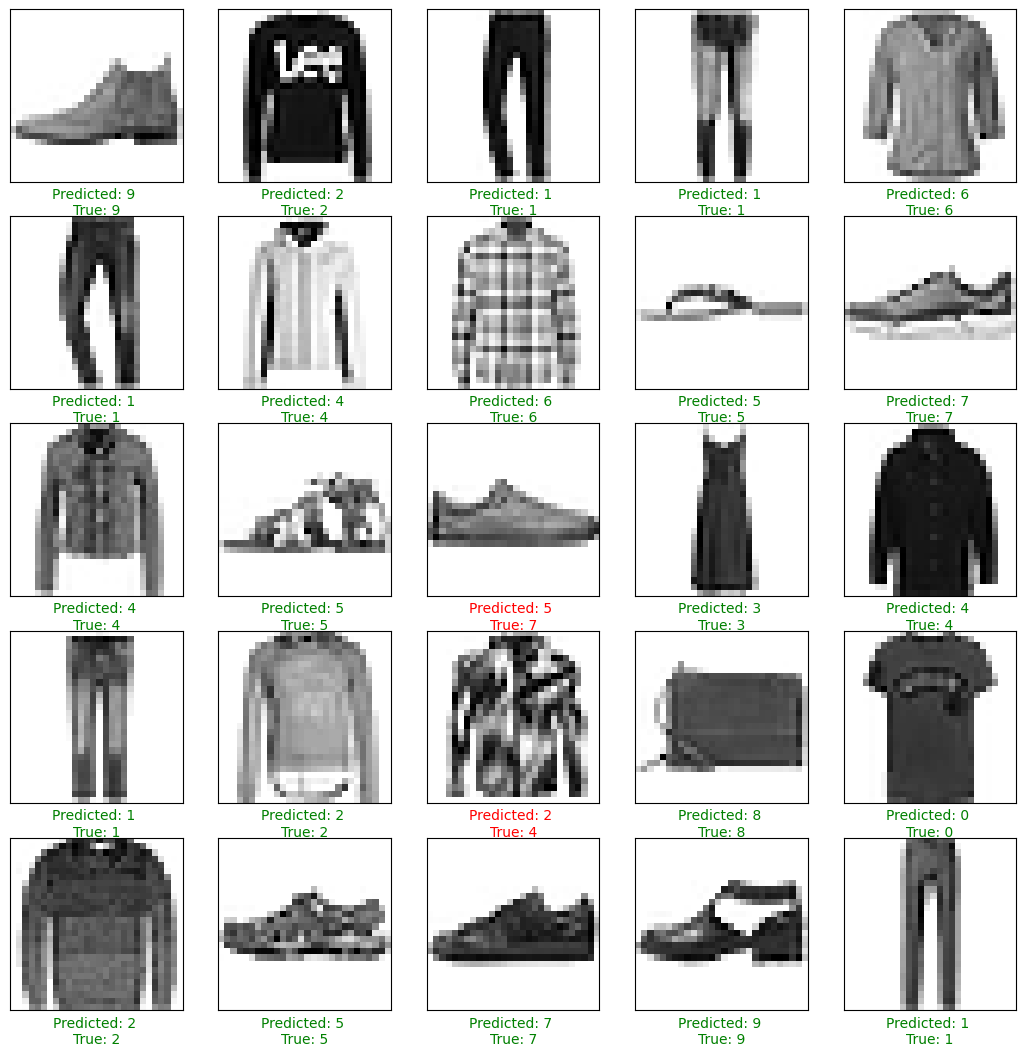

In [20]:
predictions = model.predict(test_images)

plt.figure(figsize=(13, 13))
for i in range(25):
  plt.subplot(5, 5, i + 1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(test_images[i].reshape(28, 28), cmap=plt.cm.binary)
  predicted_label = np.argmax(predictions[i])
  true_label = np.argmax(test_labels[i])
  if predicted_label == true_label:
    color = 'green'
  else:
    color = 'red'
  plt.xlabel(f"Predicted: {predicted_label} \nTrue: {true_label}", color=color)
plt.show()

### Summary
- **Logistic Regression**: You flattened the images and used `LogisticRegression` from Scikit-Learn to classify the Fashion-MNIST dataset.
- **Softmax Regression**: You used TensorFlow/Keras to build a simple neural network with a softmax activation function to classify the same dataset.